In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

ModuleNotFoundError: No module named 'torchvision'

In [2]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.3 MB/s eta 0:00:00a 0:00:01


In [3]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [4]:
batch_size = 100
learning_rate = 0.01
epoch = 10

In [5]:
mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)

data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True)

100%|██████████| 9.91M/9.91M [00:02<00:00, 3.33MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 152kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.08MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.94MB/s]


In [6]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 10)
)

In [7]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
for i in range(epoch):
    for j, [image, label] in enumerate(data_loader):
        output = model(image)
        cost = loss(output, label)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if j % 100 == 0:
            print(f'Epoch: {i+1}, Step: {j}, Loss: {cost.item():.4f}')

Epoch: 1, Step: 0, Loss: 2.3099
Epoch: 1, Step: 100, Loss: 2.2742
Epoch: 1, Step: 200, Loss: 2.2044
Epoch: 1, Step: 300, Loss: 2.1298
Epoch: 1, Step: 400, Loss: 1.9709
Epoch: 1, Step: 500, Loss: 1.7315
Epoch: 2, Step: 0, Loss: 1.4939
Epoch: 2, Step: 100, Loss: 1.1604
Epoch: 2, Step: 200, Loss: 0.9468
Epoch: 2, Step: 300, Loss: 0.8447
Epoch: 2, Step: 400, Loss: 0.7137
Epoch: 2, Step: 500, Loss: 0.5731
Epoch: 3, Step: 0, Loss: 0.5998
Epoch: 3, Step: 100, Loss: 0.5531
Epoch: 3, Step: 200, Loss: 0.4878
Epoch: 3, Step: 300, Loss: 0.6428
Epoch: 3, Step: 400, Loss: 0.4676
Epoch: 3, Step: 500, Loss: 0.4466
Epoch: 4, Step: 0, Loss: 0.3453
Epoch: 4, Step: 100, Loss: 0.5235
Epoch: 4, Step: 200, Loss: 0.5095
Epoch: 4, Step: 300, Loss: 0.3342
Epoch: 4, Step: 400, Loss: 0.3295
Epoch: 4, Step: 500, Loss: 0.3533
Epoch: 5, Step: 0, Loss: 0.2631
Epoch: 5, Step: 100, Loss: 0.3399
Epoch: 5, Step: 200, Loss: 0.2993
Epoch: 5, Step: 300, Loss: 0.3670
Epoch: 5, Step: 400, Loss: 0.2979
Epoch: 5, Step: 500, Los

In [23]:
def evaluate_dnn(model, test_loader):
    model.eval()  # 평가 모드로 전환
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'✅ [DNN] 테스트 정확도: {accuracy:.2f}%')

In [24]:
test_loader = DataLoader(dataset=mnist_test, batch_size=100, shuffle=False)
evaluate_dnn(model, test_loader)

✅ [DNN] 테스트 정확도: 97.97%


In [25]:
import matplotlib.pyplot as plt

def visualize_dnn_predictions(model, test_loader):
    model.eval()
    images, labels = next(iter(test_loader))
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    plt.figure(figsize=(10, 3))
    for i in range(5):
        img = images[i].reshape(28, 28)  # DNN에서는 Flatten된 이미지라서 다시 2D로
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Pred: {predicted[i].item()}\nLabel: {labels[i].item()}')
        plt.axis('off')
    plt.show()

In [ ]:
visualize_dnn_predictions(model, test_loader)

In [ ]:
# CNN

In [9]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [10]:
batch_size = 100
learning_rate = 0.01
epoch = 10

In [11]:
train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train, batch_size=batch_size, shuffle=True)

In [12]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2),
            torch.nn.Conv2d(32, 64, kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2)
        )
        self.fc_layer = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(64*7*7, 100),
            torch.nn.ReLU(),
            torch.nn.Linear(100, 10)
        )

    def forward(self, x):
        x = self.layer(x)
        x = self.fc_layer(x)
        return x

In [13]:
model = CNN()
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [17]:
for i in range(epoch):
    for j, [image, label] in enumerate(train_loader):
        output = model(image)
        cost = loss(output, label)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if j % 100 == 0:
            print(f'Epoch: {i+1}, Step: {j}, Loss: {cost.item():.4f}')

Epoch: 1, Step: 0, Loss: 0.0489
Epoch: 1, Step: 100, Loss: 0.0875
Epoch: 1, Step: 200, Loss: 0.1000
Epoch: 1, Step: 300, Loss: 0.0841
Epoch: 1, Step: 400, Loss: 0.0542
Epoch: 1, Step: 500, Loss: 0.0389
Epoch: 2, Step: 0, Loss: 0.0123
Epoch: 2, Step: 100, Loss: 0.0176
Epoch: 2, Step: 200, Loss: 0.0588
Epoch: 2, Step: 300, Loss: 0.0797
Epoch: 2, Step: 400, Loss: 0.1218
Epoch: 2, Step: 500, Loss: 0.0692
Epoch: 3, Step: 0, Loss: 0.0278
Epoch: 3, Step: 100, Loss: 0.1118
Epoch: 3, Step: 200, Loss: 0.0416
Epoch: 3, Step: 300, Loss: 0.0250
Epoch: 3, Step: 400, Loss: 0.0425
Epoch: 3, Step: 500, Loss: 0.0228
Epoch: 4, Step: 0, Loss: 0.0640
Epoch: 4, Step: 100, Loss: 0.0352
Epoch: 4, Step: 200, Loss: 0.0823
Epoch: 4, Step: 300, Loss: 0.0067
Epoch: 4, Step: 400, Loss: 0.0466
Epoch: 4, Step: 500, Loss: 0.0095
Epoch: 5, Step: 0, Loss: 0.0406
Epoch: 5, Step: 100, Loss: 0.0083
Epoch: 5, Step: 200, Loss: 0.0662
Epoch: 5, Step: 300, Loss: 0.0712
Epoch: 5, Step: 400, Loss: 0.1541
Epoch: 5, Step: 500, Los

In [19]:
# 정확도 측정 함수
def evaluate(model, test_loader):
    model.eval()  # 평가 모드
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'✅ 테스트 정확도: {accuracy:.2f}%')

In [20]:
# 테스트셋 로더 생성
test_loader = DataLoader(dataset=test, batch_size=100, shuffle=False)

# 평가 실행
evaluate(model, test_loader)

✅ 테스트 정확도: 97.97%


In [21]:
import matplotlib.pyplot as plt

def visualize_predictions(model, test_loader):
    model.eval()
    images, labels = next(iter(test_loader))  # 배치 하나 가져오기
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    plt.figure(figsize=(10, 3))
    for i in range(5):
        img = images[i].squeeze()  # 1x28x28 → 28x28
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Pred: {predicted[i].item()}\nLabel: {labels[i].item()}')
        plt.axis('off')
    plt.show()

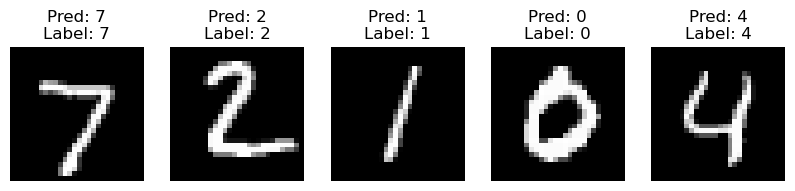

In [22]:
visualize_predictions(model, test_loader)